## MACHINE LEARNING PIPELINE for PREDICTIVE ANALYSIS

- Preprocessing (structing the data)
- Train test split (model training)
- Apply Grid Search
- Develop Hyperparameters (allow given algoritms to perform the best)

Determine Model with Best Accuracy:

TEST --> Model (Logistic Regression / Support Vector Machine /
                Desicion Tree Classifier / K-nearest Neighbors) --> Output the Confusion Metrics 
                

#### OBJECTIVES:

##### Perform exploratory Data Analysis and determine Training Labels

- create a column for the class
- Standardize the data
- Split into training data and test data

##### Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

- Find the method performs best using test data

In [11]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# This function is to plot the confusion matrix.

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

In [19]:
# LOAD THE DATASET 1

data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [26]:
# LOAD THE DATASET 2

X = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")
X

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [51]:
Y = data['Class'].to_numpy ()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [53]:
from sklearn import preprocessing

# Provided transform object
transform = preprocessing.StandardScaler()

# Fit the scaler to X and transform the data
X = transform.fit_transform(X)

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [58]:
from sklearn.model_selection import train_test_split

# Split X and Y into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [62]:
Y_test.shape

(18,)

complete 4 Tasks to create a logistic regression:

	1.	Define the parameter grid.
	2.	Create a LogisticRegression object.
	3.	Use GridSearchCV with 10-fold cross-validation.
	4.	Fit the model.
	5.	Print the best parameters and best accuracy score.

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
parameters = {
    "C": [0.01, 0.1, 1],
    "penalty": ["l2"],
    "solver": ["lbfgs"]  # 'lbfgs' supports only l2 penalty
}

# Create logistic regression model
lr = LogisticRegression()

# Create GridSearchCV object with 10-fold CV
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the model on training data
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and best accuracy score
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [75]:
#Calculate the accuracy on the test data using the method score:

# Calculate and print accuracy on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.8333333333333334


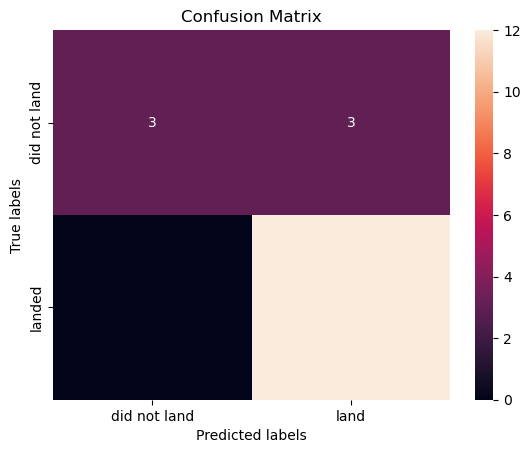

In [77]:
# Lets look at the confusion matrix:

yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)

In [82]:
# Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. 
# Fit the object to find the best parameters from the dictionary parameters.

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create Support Vector Classifier object
svm = SVC()

# Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model on training data
svm_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [84]:
# To calculate the accuracy of the tuned SVM model on the test data, 
# use the .score() method on the svm_cv object with X_test and Y_test.

# Calculate and print accuracy on the test data
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print("Test set accuracy:", svm_test_accuracy)

Test set accuracy: 0.8333333333333334


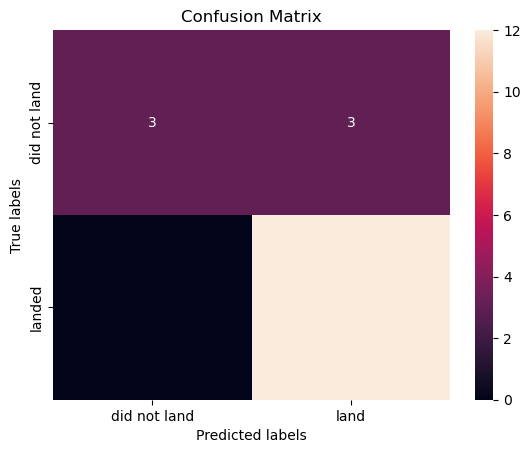

In [92]:
# We can plot the confusion matrix

yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [94]:
print("Unique values in Y_test:", np.unique(Y_test, return_counts=True))

Unique values in Y_test: (array([0, 1]), array([ 6, 12]))


In [98]:
yhat_lr = logreg_cv.predict(X_test)
yhat_svm = svm_cv.predict(X_test)

print("Same predictions?", np.array_equal(yhat_lr, yhat_svm))

Same predictions? True


In [100]:
from sklearn.metrics import confusion_matrix
print("LogReg Confusion Matrix:\n", confusion_matrix(Y_test, yhat_lr))
print("SVM Confusion Matrix:\n", confusion_matrix(Y_test, yhat_svm))

LogReg Confusion Matrix:
 [[ 3  3]
 [ 0 12]]
SVM Confusion Matrix:
 [[ 3  3]
 [ 0 12]]


In [108]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Load datasets
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")  # keep this as a DataFrame

# Extract feature names BEFORE scaling
feature_names = X_df.columns

# Extract target variable
Y = data['Class'].to_numpy()

# Standardize the features
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_df)

# Split into train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameters and train
params = {'C':[0.01, 0.1, 1], 'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, params, cv=10)
logreg_cv.fit(X_train, Y_train)

# Feature importance
coef = logreg_cv.best_estimator_.coef_[0]
for name, weight in zip(feature_names, coef):
    print(f"{name}: {weight:.4f}")

FlightNumber: 0.0476
PayloadMass: 0.0236
Flights: -0.0006
Block: 0.0533
ReusedCount: 0.0783
Orbit_ES-L1: 0.0238
Orbit_GEO: 0.0171
Orbit_GTO: -0.0456
Orbit_HEO: 0.0000
Orbit_ISS: -0.0004
Orbit_LEO: 0.0340
Orbit_MEO: -0.0070
Orbit_PO: -0.0008
Orbit_SO: -0.0419
Orbit_SSO: 0.0239
Orbit_VLEO: 0.0224
LaunchSite_CCAFS SLC 40: -0.0243
LaunchSite_KSC LC 39A: 0.0154
LaunchSite_VAFB SLC 4E: 0.0149
LandingPad_5e9e3032383ecb267a34e7c7: 0.0532
LandingPad_5e9e3032383ecb554034e7c9: 0.0241
LandingPad_5e9e3032383ecb6bb234e7ca: 0.0513
LandingPad_5e9e3032383ecb761634e7cb: 0.0000
LandingPad_5e9e3033383ecbb9e534e7cc: 0.0269
Serial_B0003: 0.0000
Serial_B0005: -0.0322
Serial_B0007: -0.0300
Serial_B1003: 0.0000
Serial_B1004: -0.0286
Serial_B1005: -0.0286
Serial_B1006: 0.0367
Serial_B1007: 0.0345
Serial_B1008: -0.0288
Serial_B1010: -0.0304
Serial_B1011: -0.0289
Serial_B1012: 0.0000
Serial_B1013: 0.0238
Serial_B1015: 0.0000
Serial_B1016: 0.0000
Serial_B1017: -0.0548
Serial_B1018: -0.0537
Serial_B1019: 0.0229
Ser

##### Example: Predicting With Your Model:

- Let’s say you have a new rocket launch with these feature values (after standardizing):

In [131]:
import pandas as pd
import numpy as np

# Load the original feature data (not scaled)
X_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")

# Select one example row (say row 5)
new_launch_raw = X_df.iloc[[5]]  # double brackets keeps it as a DataFrame

# Standardize it using the scaler you already fitted
new_launch_scaled = transform.transform(new_launch_raw)

# Predict class (0 = failure, 1 = success)
yhat = logreg_cv.predict(new_launch_scaled)
print("✅ Predicted outcome (0=failure, 1=success):", yhat[0])

# Predict probability
prob = logreg_cv.predict_proba(new_launch_scaled)
print(f"🔍 Probability of success: {prob[0][1]:.4f}")
print(f"🔍 Probability of failure: {prob[0][0]:.4f}")

✅ Predicted outcome (0=failure, 1=success): 1
🔍 Probability of success: 1.0000
🔍 Probability of failure: 0.0000


/Users/cansezgin/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


##### Desicion Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create Decision Tree classifier
tree = DecisionTreeClassifier()

# Create GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the model
tree_cv.fit(X_train, Y_train)

# Print best parameters and accuracy
print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8892857142857145


/Users/cansezgin/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/cansezgin/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/cansezgin/.local/lib/python3.11/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/Users/cansezgin/.local/lib/python3.11/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraints(
  Fil

In [141]:
# Calculate accuracy on the test set
tree_test_accuracy = tree_cv.score(X_test, Y_test)

# Output result
print("Test set accuracy:", tree_test_accuracy)

Test set accuracy: 0.8888888888888888


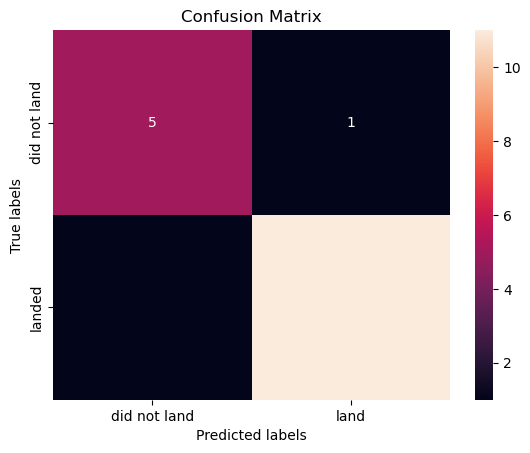

In [143]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [145]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(Y_test, yhat))
print(confusion_matrix(Y_test, yhat))
print(classification_report(Y_test, yhat))

Accuracy: 0.8888888888888888
[[ 5  1]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.92      0.92      0.92        12

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



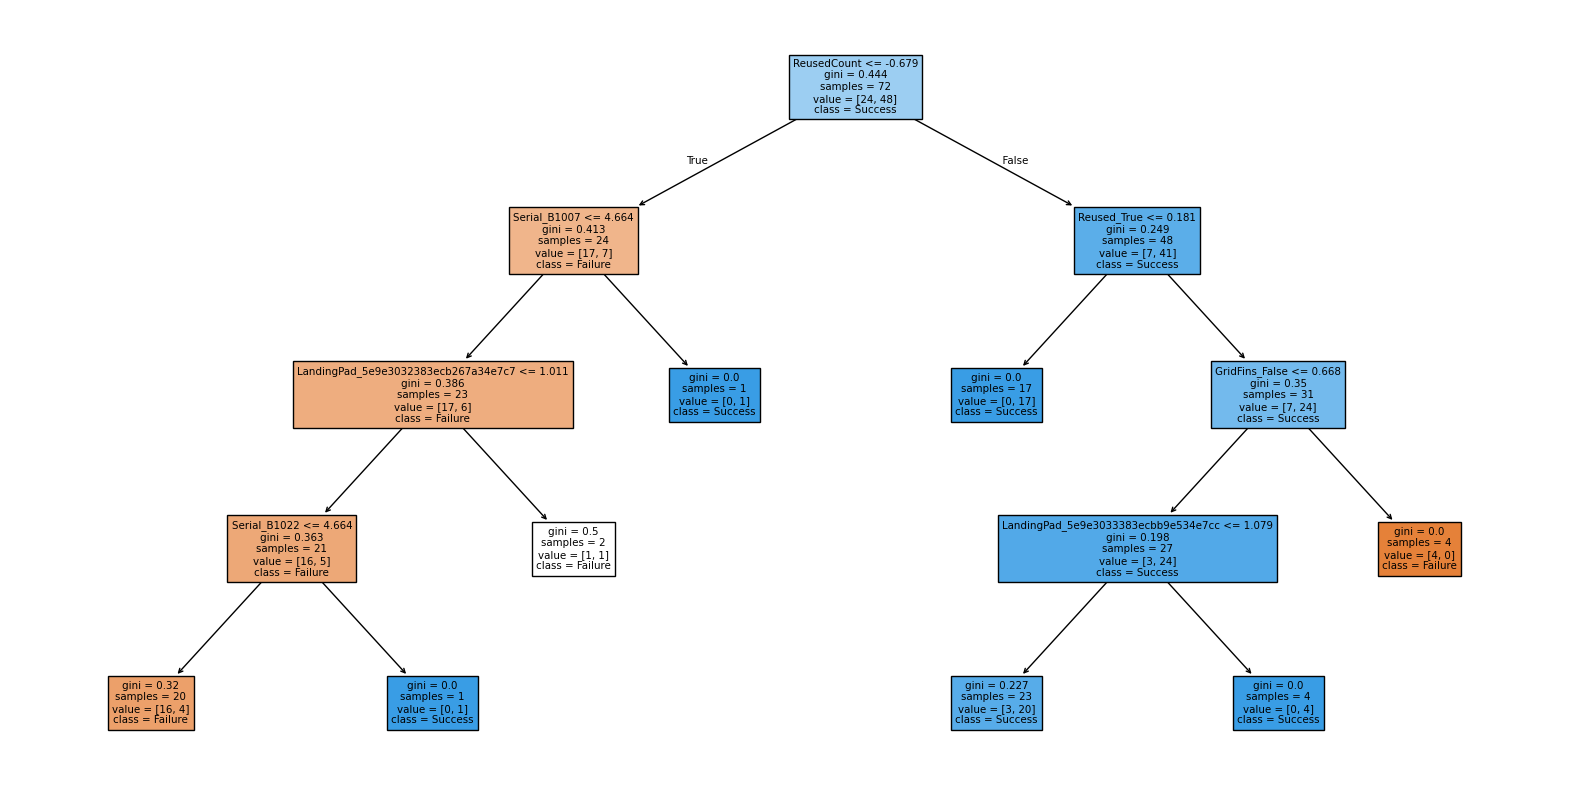

In [147]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_cv.best_estimator_, feature_names=feature_names, class_names=["Failure", "Success"], filled=True)
plt.show()

In [149]:
importances = tree_cv.best_estimator_.feature_importances_

for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

FlightNumber: 0.0000
PayloadMass: 0.0000
Flights: 0.0000
Block: 0.0000
ReusedCount: 0.5224
Orbit_ES-L1: 0.0000
Orbit_GEO: 0.0000
Orbit_GTO: 0.0000
Orbit_HEO: 0.0000
Orbit_ISS: 0.0000
Orbit_LEO: 0.0000
Orbit_MEO: 0.0000
Orbit_PO: 0.0000
Orbit_SO: 0.0000
Orbit_SSO: 0.0000
Orbit_VLEO: 0.0000
LaunchSite_CCAFS SLC 40: 0.0000
LaunchSite_KSC LC 39A: 0.0000
LaunchSite_VAFB SLC 4E: 0.0000
LandingPad_5e9e3032383ecb267a34e7c7: 0.0129
LandingPad_5e9e3032383ecb554034e7c9: 0.0000
LandingPad_5e9e3032383ecb6bb234e7ca: 0.0000
LandingPad_5e9e3032383ecb761634e7cb: 0.0000
LandingPad_5e9e3033383ecbb9e534e7cc: 0.0060
Serial_B0003: 0.0000
Serial_B0005: 0.0000
Serial_B0007: 0.0000
Serial_B1003: 0.0000
Serial_B1004: 0.0000
Serial_B1005: 0.0000
Serial_B1006: 0.0000
Serial_B1007: 0.0540
Serial_B1008: 0.0000
Serial_B1010: 0.0000
Serial_B1011: 0.0000
Serial_B1012: 0.0000
Serial_B1013: 0.0000
Serial_B1015: 0.0000
Serial_B1016: 0.0000
Serial_B1017: 0.0000
Serial_B1018: 0.0000
Serial_B1019: 0.0000
Serial_B1020: 0.000

In [151]:
import joblib
joblib.dump(tree_cv.best_estimator_, 'best_decision_tree.pkl')

['best_decision_tree.pkl']

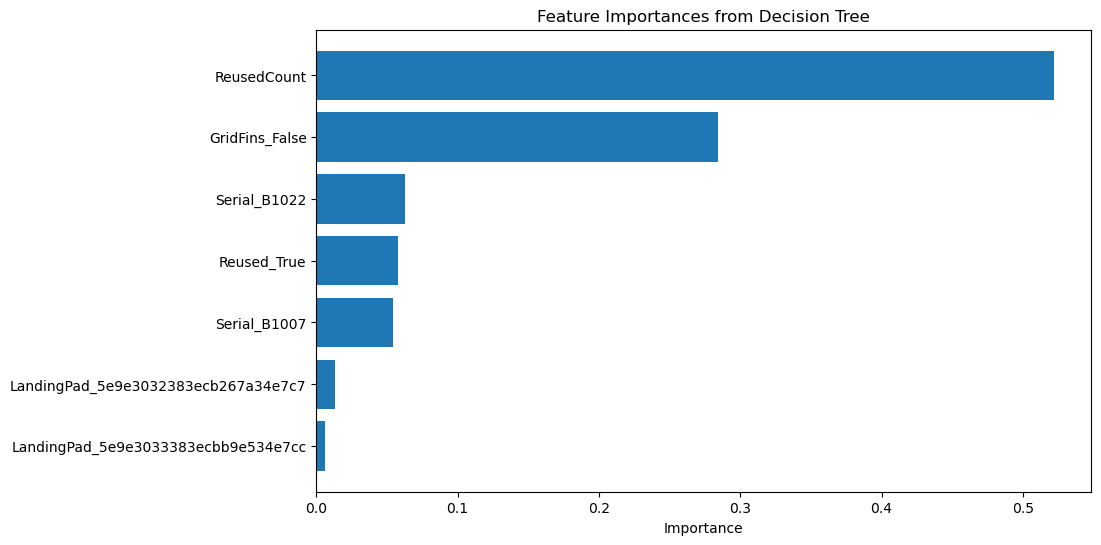

In [153]:
import matplotlib.pyplot as plt

importances = tree_cv.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = [feature_names[i] for i in indices if importances[i] > 0]

plt.figure(figsize=(10,6))
plt.barh(top_features[::-1], sorted(importances[importances > 0]))
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Importance")
plt.show()

In [159]:
# Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. 
# Fit the object to find the best parameters from the dictionary parameters.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# Create KNN classifier object
KNN = KNeighborsClassifier()

# Create GridSearchCV with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit to training data
knn_cv.fit(X_train, Y_train)

# Output best hyperparameters and best accuracy
print("tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [161]:
# Calculate accuracy on the test data
knn_test_accuracy = knn_cv.score(X_test, Y_test)

# Output result
print("Test set accuracy:", knn_test_accuracy)

Test set accuracy: 0.8333333333333334


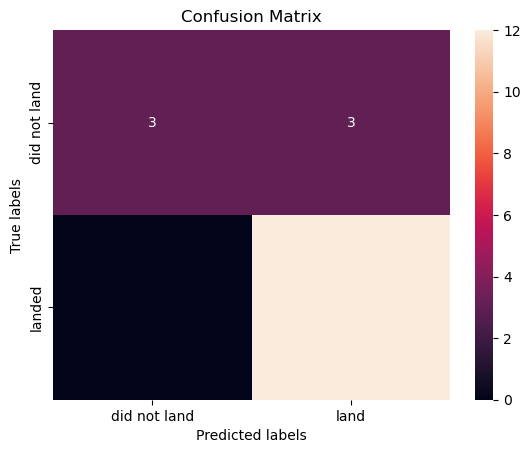

In [163]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

to compare the test set accuracy of all the models you’ve trained so far:

In [186]:
# Define model comparison as a list of dictionaries
model_info = [
    {"Model": "Logistic Regression", "Variable": "logreg_cv", "Accuracy Code": "logreg_cv.score(X_test, Y_test)"},
    {"Model": "Support Vector Machine", "Variable": "svm_cv", "Accuracy Code": "svm_cv.score(X_test, Y_test)"},
    {"Model": "Decision Tree", "Variable": "tree_cv", "Accuracy Code": "tree_cv.score(X_test, Y_test)"},
    {"Model": "K-Nearest Neighbors", "Variable": "knn_cv", "Accuracy Code": "knn_cv.score(X_test, Y_test)"}
]

# Build Markdown table
markdown = "| Model                  | Variable   | Accuracy Calculation           |\n"
markdown += "|------------------------|------------|----------------------------- --|\n"

for row in model_info:
    markdown += f"| {row['Model']:<22} | {row['Variable']:<10} | `{row['Accuracy Code']}` |\n"

# Print Markdown table
print(markdown)

| Model                  | Variable   | Accuracy Calculation           |
|------------------------|------------|----------------------------- --|
| Logistic Regression    | logreg_cv  | `logreg_cv.score(X_test, Y_test)` |
| Support Vector Machine | svm_cv     | `svm_cv.score(X_test, Y_test)` |
| Decision Tree          | tree_cv    | `tree_cv.score(X_test, Y_test)` |
| K-Nearest Neighbors    | knn_cv     | `knn_cv.score(X_test, Y_test)` |



In [169]:
# Logistic Regression
logreg_accuracy = logreg_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy:", logreg_accuracy)

# Support Vector Machine
svm_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy:", svm_accuracy)

# Decision Tree
tree_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", tree_accuracy)

# K-Nearest Neighbors
knn_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", knn_accuracy)

# Find the best method
accuracies = {
    "Logistic Regression": logreg_accuracy,
    "SVM": svm_accuracy,
    "Decision Tree": tree_accuracy,
    "KNN": knn_accuracy
}

best_model = max(accuracies, key=accuracies.get)
print(f"\n✅ Best performing model: {best_model} with accuracy = {accuracies[best_model]:.4f}")

Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
Decision Tree Test Accuracy: 0.8888888888888888
KNN Test Accuracy: 0.8333333333333334

✅ Best performing model: Decision Tree with accuracy = 0.8889


In [171]:
# Generate Markdown table
markdown_table = "| Model                | Test Accuracy |\n"
markdown_table += "|----------------------|---------------|\n"

for model, acc in accuracies.items():
    markdown_table += f"| {model:<20} | {acc:.4f}        |\n"

# Highlight the best model
markdown_table += f"\n✅ **Best performing model: {best_model}** with accuracy = **{accuracies[best_model]:.4f}**"

# Print the Markdown table
print(markdown_table)

| Model                | Test Accuracy |
|----------------------|---------------|
| Logistic Regression  | 0.8333        |
| SVM                  | 0.8333        |
| Decision Tree        | 0.8889        |
| KNN                  | 0.8333        |

✅ **Best performing model: Decision Tree** with accuracy = **0.8889**


In [190]:
importances = tree_cv.best_estimator_.feature_importances_
zero_importance_features = [name for name, score in zip(feature_names, importances) if score == 0.0]
print("Features to remove:", zero_importance_features)

Features to remove: ['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb554034e7c9', 'LandingPad_5e9e3032383ecb6bb234e7ca', 'LandingPad_5e9e3032383ecb761634e7cb', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029', 'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034', 'Serial_B1035', 'Serial_B1036', 'Serial_B1037', 'Serial_B1038', 'Serial_B1039', 'Serial_B1040', 'Serial_B1041', 'Serial_B1042', 'Serial_B1043

In [196]:
# Drop irrelevant features
X_df_reduced = X_df.drop(columns=zero_importance_features)

# Check remaining features
print("Remaining features:", X_df_reduced.columns.tolist())

Remaining features: ['ReusedCount', 'LandingPad_5e9e3032383ecb267a34e7c7', 'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B1007', 'Serial_B1022', 'GridFins_False', 'Reused_True']


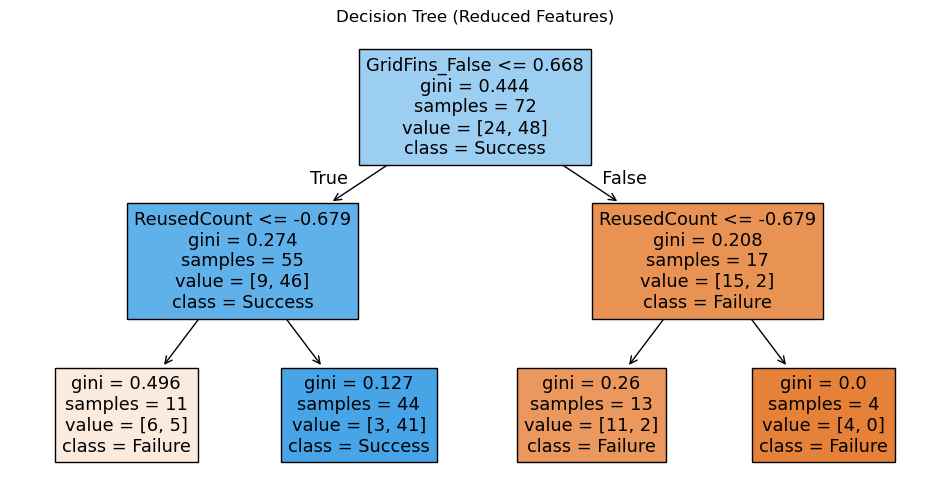

In [202]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Standardize reduced features
scaler = StandardScaler()
X_scaled_reduced = scaler.fit_transform(X_df_reduced)

# 2. Train/test split
X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X_scaled_reduced, Y, test_size=0.2, random_state=2)

# 3. GridSearch on Decision Tree
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree_model = DecisionTreeClassifier()
tree_cv_reduced = GridSearchCV(tree_model, params, cv=10)
tree_cv_reduced.fit(X_train_r, Y_train_r)  # ✅ must run this first!

# 4. Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(tree_cv_reduced.best_estimator_, feature_names=X_df_reduced.columns,
          class_names=["Failure", "Success"], filled=True)
plt.title("Decision Tree (Reduced Features)")
plt.show()